In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('../Datasets/train.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Categorical Data

## a. Countplot

<Axes: xlabel='Embarked'>

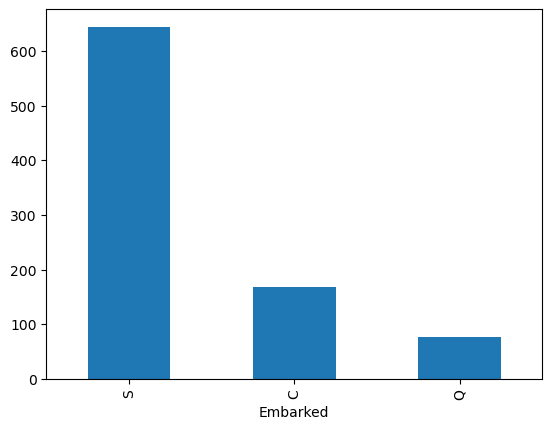

In [5]:

#df['Survived'].value_counts().plot(kind='bar')
df['Embarked'].value_counts().plot(kind='bar')

## b. PieChart

<Axes: ylabel='count'>

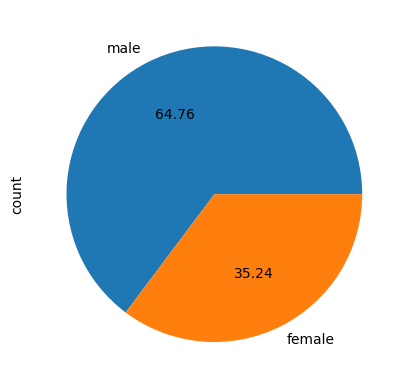

In [6]:
df['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

<div style="border-top:black 2px solid"></div>

# 2. Numerical Data

## a. Histogram

(array([100., 346., 188.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <BarContainer object of 5 artists>)

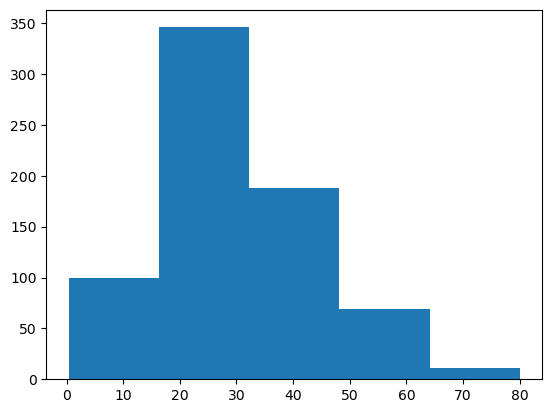

In [7]:
import matplotlib.pyplot as plt
plt.hist(df['Age'],bins=5)

## b. Distplot

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


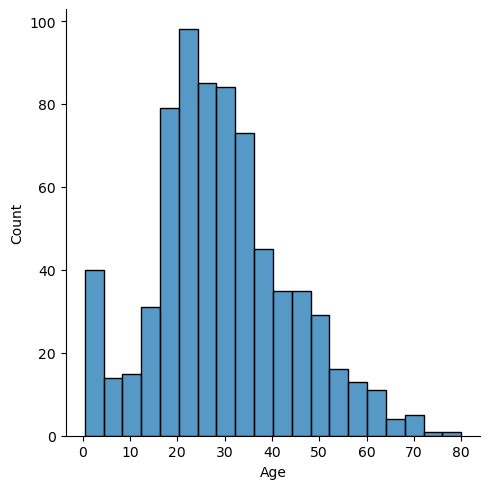

In [8]:
sns.displot(df['Age'])

## c. Boxplot

<Axes: >

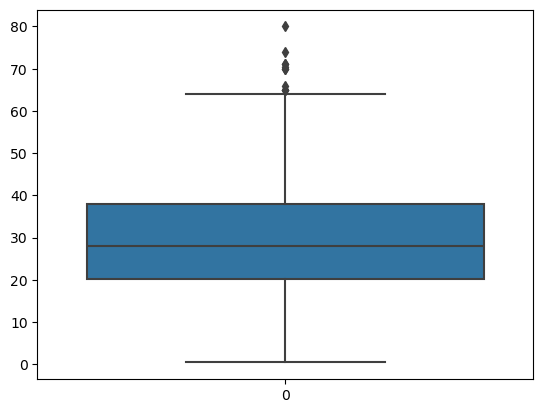

In [9]:
sns.boxplot(df['Age'])

In [10]:
df['Age'].min()

0.42

In [11]:
df['Age'].max()

80.0

In [12]:
df['Age'].mean()

29.69911764705882

In [13]:
df['Age'].skew()

0.38910778230082704

# Project :- Build a model to predict whether a person would survive or not.


# Data Preprocessing

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df[df['Age'].isna() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [16]:
df.drop(['Name','PassengerId','Ticket','Cabin'],inplace=True,axis=1)

In [17]:
df_features=df[['Sex','Fare','Pclass']]
df_target = df['Survived']
print(df_features.shape)
print(df_target.shape)


(891, 3)
(891,)


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_features,df_target,test_size=0.2, random_state=2)
print(X_train.shape)
print(y_test.shape)

(712, 3)
(179,)


In [19]:
transformer = ColumnTransformer(remainder='passthrough',transformers = [('tnf1',OneHotEncoder(sparse_output=False, drop='first'), ['Sex']), ('tnf2', StandardScaler(), ['Fare'])])

X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)
X_train.shape

(712, 3)

In [20]:
X_test.shape

(179, 3)

# Model Building
    
    I have 3 primary models in  my mind for classification purposes : LogisticRegression, SVM, DecisionTreeClassifier and KNN. Let's try each of them one by one, do hyper-parameter tuning of each of them, select the best model for that technique and then compare the best models for each technique and then select the best model.
    

In [21]:
best_models = pd.DataFrame(columns = ["Model Technique", "Accuracy Score", "Hyperparameters"],data=[])

## Logistic Regression

In [22]:
lr = LogisticRegression()
parameters = {'penalty' : ['l2'],"C":[100,10,1,0.1,0.01,0.001],"solver" : ["liblinear","lbfgs","newton-cg"]}
Grid1 = GridSearchCV(lr,param_grid= parameters, scoring=['neg_log_loss','r2','accuracy'], refit="accuracy", cv=5, verbose=4)
Grid1.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END C=100, penalty=l2, solver=liblinear; accuracy: (test=0.804) neg_log_loss: (test=-0.433) r2: (test=0.161) total time=   0.4s
[CV 2/5] END C=100, penalty=l2, solver=liblinear; accuracy: (test=0.790) neg_log_loss: (test=-0.460) r2: (test=0.101) total time=   0.0s
[CV 3/5] END C=100, penalty=l2, solver=liblinear; accuracy: (test=0.782) neg_log_loss: (test=-0.434) r2: (test=0.059) total time=   0.0s
[CV 4/5] END C=100, penalty=l2, solver=liblinear; accuracy: (test=0.789) neg_log_loss: (test=-0.481) r2: (test=0.090) total time=   0.0s
[CV 5/5] END C=100, penalty=l2, solver=liblinear; accuracy: (test=0.775) neg_log_loss: (test=-0.483) r2: (test=0.037) total time=   0.0s
[CV 1/5] END C=100, penalty=l2, solver=lbfgs; accuracy: (test=0.804) neg_log_loss: (test=-0.433) r2: (test=0.161) total time=   0.3s
[CV 2/5] END C=100, penalty=l2, solver=lbfgs; accuracy: (test=0.790) neg_log_loss: (test=-0.460) r2: (test=0.101) total t

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg']},
             refit='accuracy', scoring=['neg_log_loss', 'r2', 'accuracy'],
             verbose=4)

In [23]:
Grid1.best_score_
best_model=Grid1.best_estimator_

In [24]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.7653631284916201


In [25]:
params = str(Grid1.best_params_) 
best_models = pd.concat([best_models, pd.DataFrame({"Model Technique" : "LogisticRegression", "Accuracy Score" : accuracy, "Hyperparameters" : params}, index=[0])])

C:\Users\RAJ\AppData\Local\Temp\ipykernel_35308\1726700507.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  best_models = pd.concat([best_models, pd.DataFrame({"Model Technique" : "LogisticRegression", "Accuracy Score" : accuracy, "Hyperparameters" : params}, index=[0])])


In [26]:
best_models

,Model Technique,Accuracy Score,Hyperparameters
0,LogisticRegression,0.765363,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}"


## Support Vector Machine(SVM)

In [ ]:
from sklearn.svm import SVC
svm_model=SVC()
params = {
    'C': [100, 10, 1, 0.1, 0.01],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [100, 10, 1, 0.1, 0.01],
    'degree': [1, 2, 3]}
Grid2 = GridSearchCV(svm_model, param_grid=params, scoring=['accuracy','jaccard'],refit="accuracy",cv=5,verbose=4).fit(X_train,y_train)

print(Grid2.best_estimator_)


In [ ]:
best_model = Grid2.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)


In [ ]:
params = str(Grid2.best_params_) 
best_models = pd.concat([best_models, pd.DataFrame({"Model Technique" : "SVM", "Accuracy Score" : accuracy, "Hyperparameters" : params}, index=[0])])

## Decision Trees

In [28]:


tree_model = DecisionTreeClassifier()
params = {'criterion' : ['gini','entropy'], 'max_depth' : [2,3,5,7],'min_samples_split' : [20,30,40],'min_samples_leaf' : [10,20,40]}
Grid3 = GridSearchCV(tree_model, param_grid=params, scoring=['accuracy','jaccard'],refit="accuracy",cv=5,verbose=4).fit(X_train,y_train)
y_pred = Grid3.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=20; accuracy: (test=0.783) jaccard: (test=0.446) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=20; accuracy: (test=0.825) jaccard: (test=0.545) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=20; accuracy: (test=0.810) jaccard: (test=0.481) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=20; accuracy: (test=0.761) jaccard: (test=0.358) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=20; accuracy: (test=0.775) jaccard: (test=0.522) total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=10, min_samples_split=30; accuracy: (test=0.783) jaccard: (test=0.446) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, mi

In [29]:
params = str(Grid3.best_params_) 
best_models = pd.concat([best_models, pd.DataFrame({"Model Technique" : "Decision Tree", "Accuracy Score" : accuracy, "Hyperparameters" : params}, index=[0])])

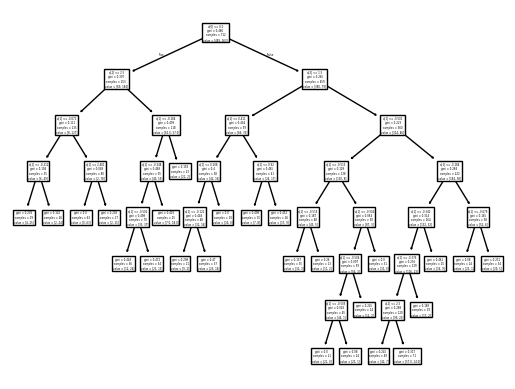

In [30]:
plot_tree(Grid3.best_estimator_);

# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
params = {'n_neighbors' : [i for i in range(1,11)], 'weights' : ['uniform','distance'],'metric' : ["euclidean","manhattan","cosine"]}
knn_model = KNeighborsClassifier()
Grid4 = GridSearchCV(knn_model, param_grid=params, scoring=['accuracy','jaccard'],refit="accuracy",cv=5,verbose=4).fit(X_train,y_train)
y_pred = Grid4.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END metric=euclidean, n_neighbors=1, weights=uniform; accuracy: (test=0.853) jaccard: (test=0.656) total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=1, weights=uniform; accuracy: (test=0.839) jaccard: (test=0.641) total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=1, weights=uniform; accuracy: (test=0.803) jaccard: (test=0.582) total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=1, weights=uniform; accuracy: (test=0.768) jaccard: (test=0.507) total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=1, weights=uniform; accuracy: (test=0.725) jaccard: (test=0.451) total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=1, weights=distance; accuracy: (test=0.853) jaccard: (test=0.656) total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=1, weights=distance; accuracy: (test=0.839) jaccard: (test=0.641) total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=1, w

In [33]:
params = str(Grid3.best_params_)
best_models = pd.concat([best_models, pd.DataFrame({"Model Technique" : "KNN", "Accuracy Score" : accuracy, "Hyperparameters" : params}, index=[0])])

In [34]:
best_models

,Model Technique,Accuracy Score,Hyperparameters
0,LogisticRegression,0.765363,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}"
0,Decision Tree,0.782123,"{'criterion': 'gini', 'max_depth': 7, 'min_sam..."
0,KNN,0.793296,"{'criterion': 'gini', 'max_depth': 7, 'min_sam..."
